日常工作中经常要用到 matplotlib 来绘图，每次绘图碰到一些细节问题都得谷歌，下次遇到继续谷歌 :) 不知道你是否跟我一样。一方面是自己太懒了，没总结；另一方面，是 matplotlib 实现同一个目标的方式太多了。

比如设置图片标题，可以使用 `plt.title()`，也可以使用 `ax.set_title()`。出现这种情况的原因是 matplotlib 提供了两套接口来实现相同的功能：一套是类 MATLAB 工作风格的接口（方便 MATLAB 党丝滑迁移过来），一套是面向对象风格的接口（面向程序员）。这就造成了很多 matplotlib 初学者两种风格代码混用的情况，比如我 :)

这篇文章的主要内容如下：

- 介绍 matplotlib 绘图的基本原理和标准步骤
- 对 MATLAB 风格与面向对象风格做一个比较
- 绘图细节与如何画出精美的图
- 总结数据分析中常用图表的绘图模板代码

# matplotlib 是如何绘图的？

matplotlib 内部封装了三层 API：

- `FigureCanvas`：绘图区域；
- `Renderer`：可以理解为画笔，控制绘图行为；
- `Artist`：如何使用 `Renderer` 绘图。

`FigureCanvas` 和 `Renderer` 解决与计算机底层的交互问题，`Artist` 控制点、线、文字、图片等图像要素在绘图区域上展现的细节问题。因此，我们要画出心仪的图像，只需要用好 `Artist` 对象就可以了 —— 做一个优秀的艺术家！

`Artist` 对象有两种类型：

- 基础对象（primitives）：包括点、线、文字、图片等等我们希望呈现的要素；
- 容器对象（containers）：包括画布、坐标轴、坐标系。

不难理解，容器对象是用来放置基础对象的。我们在数学作图的时候，也是先画一个框，再画一个坐标系，坐标轴标好刻度，再作图。与之类似，使用 matplotlib 绘图的标准步骤是：

- 创建一个 `figure` 实例；
- 使用 `figure` 实例创建一个或多个 `Axes` 或者 `Subplot` 实例;
- 使用 `Axes` 实例方法创建 primitives。

下面我们就按照这个逻辑来作图。首先我们使用 `plt.figure` 创建 `figure` 实例，然后使用 `figure.add_axes()` 方法创建坐标系，最后使用 `plot` 方法在坐标系上画图。

> **NOTE:** `figure.add_axes()` 允许我们在画布任意位置创建坐标系，传入 `rect=[left, bottom, width, height]` 参数控制坐标系在画布中位置的百分比。


In [1]:
import matplotlib.pyplot as plt
import numpy as np

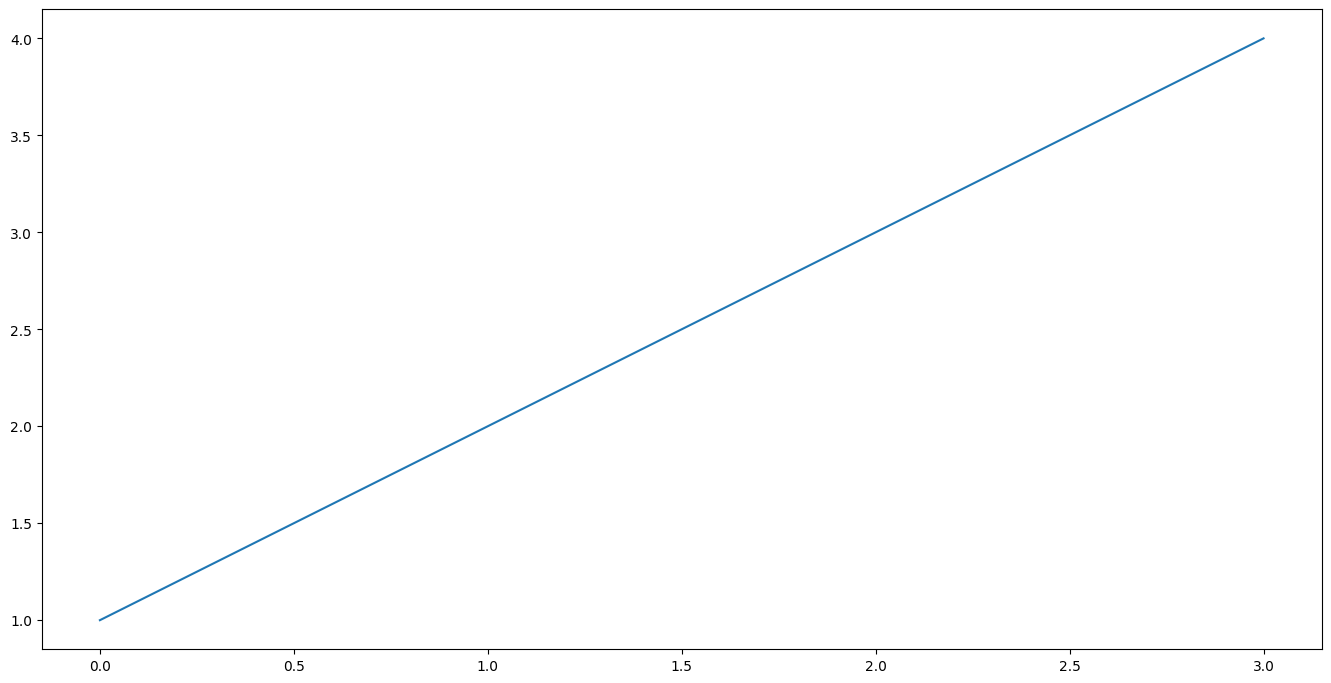

In [3]:
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8 # Quantities are in fractions of figure width and height.
rect = left, bottom, width, height # the dimension of `Axes` object
fig = plt.figure(figsize=(16, 8), dpi=100) # create a `figure` object, `figsize` sets the dimension, `dpi` sets pixel units.
ax = fig.add_axes(rect)
ax.plot([1, 2, 3, 4]) # plot y using x as index array 0..N-1
plt.show()

除了添加坐标系，我们还可以使用 `figure.add_subplot` 方法直接添加子图。子图是 `Axes` 的一个子类，我们可以把子图看作画布矩阵中的一个元素，每个元素有自己的坐标系，我们可以在上面画图。比如，在下面的代码中，我们创建两个子图。


fig.axes:  [<Axes: >, <Axes: >]
ax1.figure: Figure(1600x800)
ax2.figure:  Figure(1600x800)
ax1.xaxis:  XAxis(200.0,424.0)
ax2.xaxis:  XAxis(200.0,87.99999999999999)
ax1.yaxis:  YAxis(200.0,424.0)
ax2.yaxis:  YAxis(200.0,87.99999999999999)


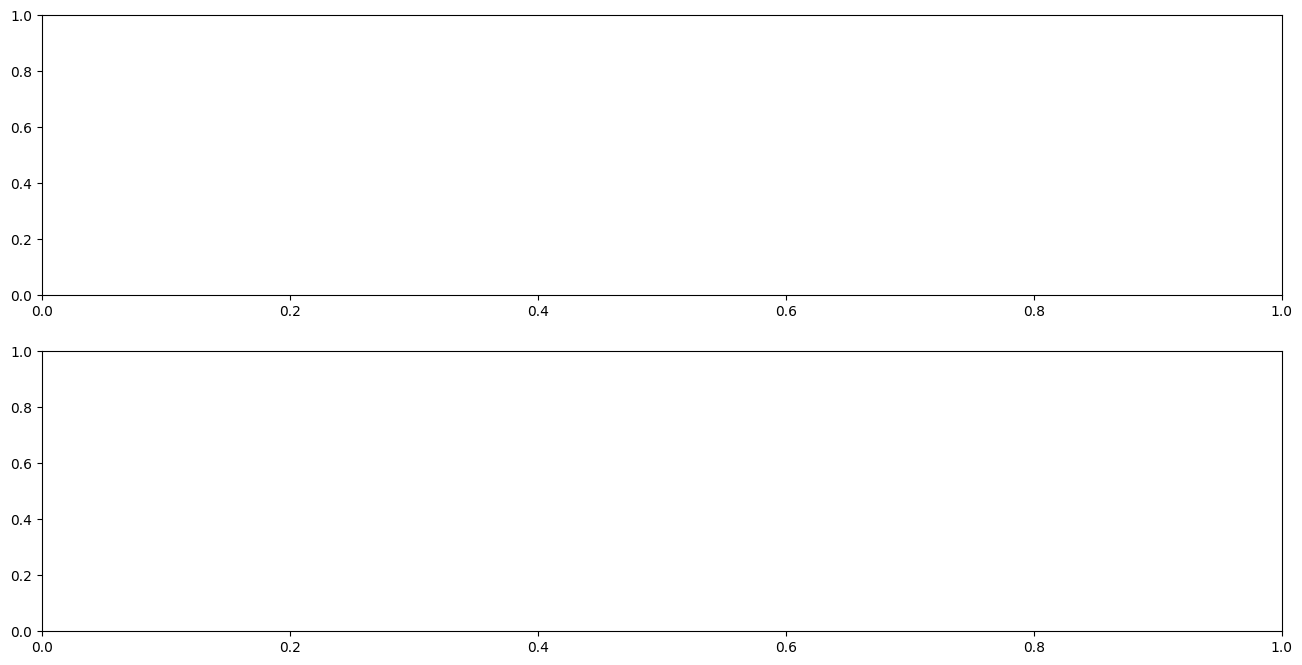

In [4]:
fig = plt.figure(figsize=(16, 8), dpi=100)
ax1 = fig.add_subplot(2, 1, 1) # 2 rows, 1 column, the first subplot
ax2 = fig.add_subplot(2, 1, 2) # 2 rows, 1 column, the second subplot

print('fig.axes: ', fig.axes)
print('ax1.figure:' , ax1.figure)
print('ax2.figure: ', ax2.figure)
print('ax1.xaxis: ', ax1.xaxis)
print('ax2.xaxis: ', ax2.xaxis)
print('ax1.yaxis: ', ax1.yaxis)
print('ax2.yaxis: ', ax2.yaxis)

以上输出可以发现，`figure` 对象包含两个坐标系；ax1 和 ax2 所处的 `figure` 是一样的；ax1 和 ax2 的坐标轴不一样。

除了先生成图，再添加坐标系，我们也可以使用 [`plt.subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) 方法同时生成图和坐标系。比如，下面我们同时生成横向的两个子图，并让它们共享 Y 轴。


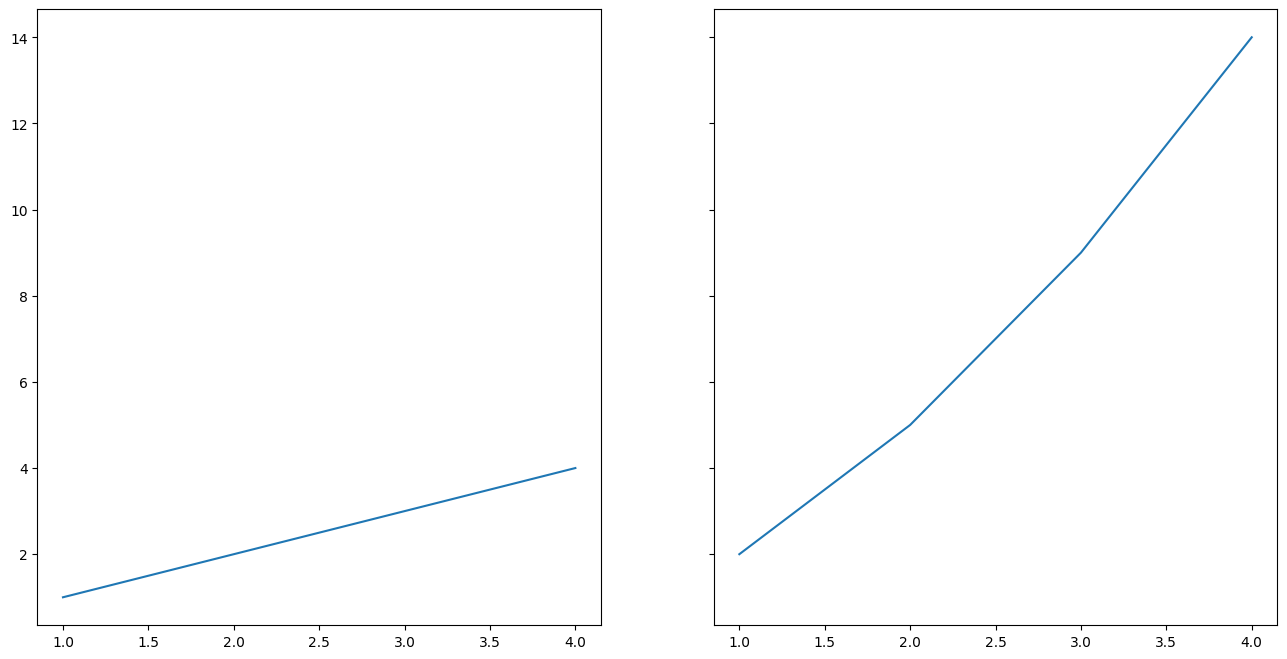

In [5]:
# create some toy data
x = [1, 2, 3, 4]
y1 = [1, 2, 3, 4]
y2 = [2, 5, 9, 14]
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 8), dpi=100)
ax1.plot(x, y1)
ax2.plot(x, y2)

# OO-style vs Pyplot-style

在上面的代码中，我们使用了面向对象的风格来使用 matplotlib，即首先显示地创建了图和坐标系实例，再调用它们的方法实现绘图。除此之外，matplotlib 还提供了另一套模仿 MATLAB 的接口，即 Pyplot-style interface。比如下面的代码：


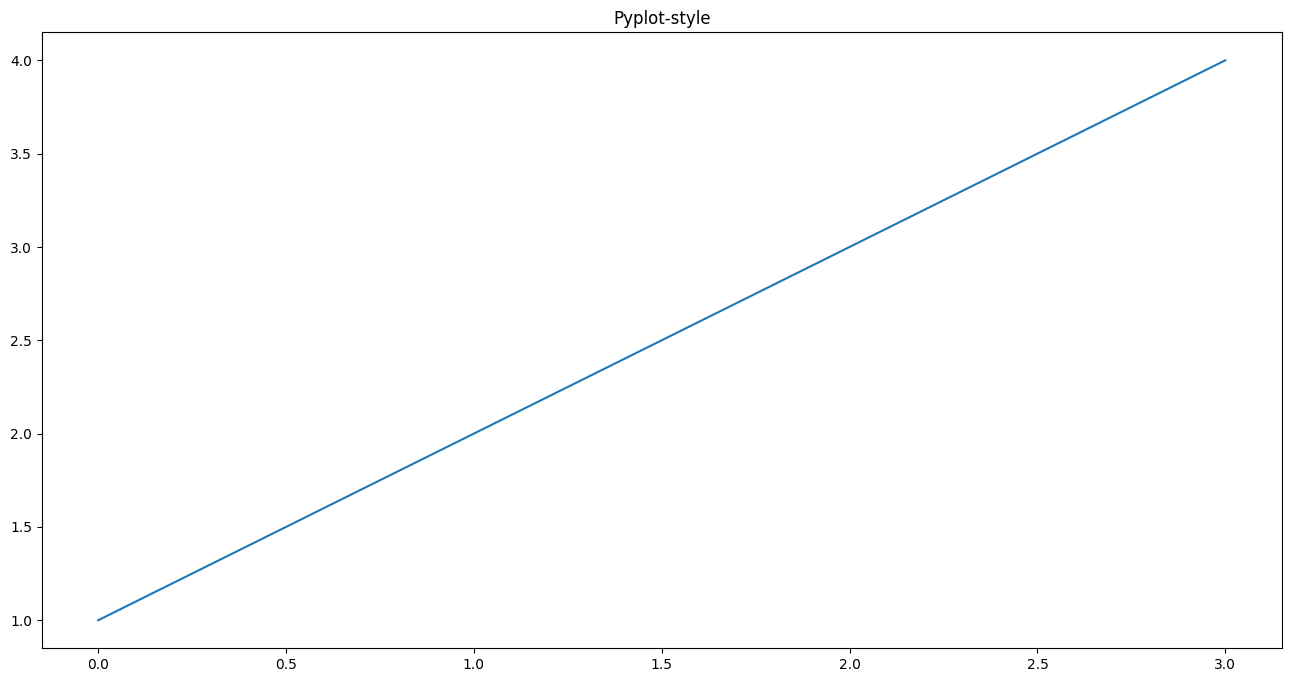

In [6]:
plt.figure(figsize=(16, 8), dpi=100)

plt.plot([1, 2, 3, 4])
plt.title('Pyplot-style')
plt.show()

Pyplot-style 接口是基于状态的接口（state-based interface）。我的理解是每调用一次 `pyplot` 中的命令就会改变一下当前的状态（也就是图像），并将改变之后的状态保存下来，`plt.show()` 展示最终的状态。而 OO-style 是每次新建一个对象，调用该对象的方法从而在画布上创建新的内容。

两者相比，Pyplot-style 接口简洁，方便我们快速的生成各类图像，但是功能不够强大。OO-style 是官方文档推荐我们使用的方式，功能更加强大，我们可以更自由的控制画布中的元素，从而实现图形的定制。因此，在接下来的内容里，我们都使用 OO-style 的方式来绘图。

# 画一张精美的图

要画一张精美的图，就需要对 `Artist` 对象进行定制。首先附上官方文档里的这张图。

![Artist](./parts_of_a_figure.png "Artist")

我们可以对各种 `Aritst` 类型对象进行定制，包括：

- 画布
- 坐标系
- 坐标轴
- 点、线
- 文字
- 图例
- annotation


## 坐标轴

matplotlib 的 [`Axes`](https://matplotlib.org/stable/users/explain/axes/axes_intro.html) 是绘图的入口。一旦在图上放置了一个 `Axes`，就可以使用许多方法向`Axes` 添加数据。一个 `Axes` 通常具有一对 `Axis` Artists，它们定义了数据坐标系，并包括添加注释（如 x 轴和 y 轴标签、标题和图例）的方法。


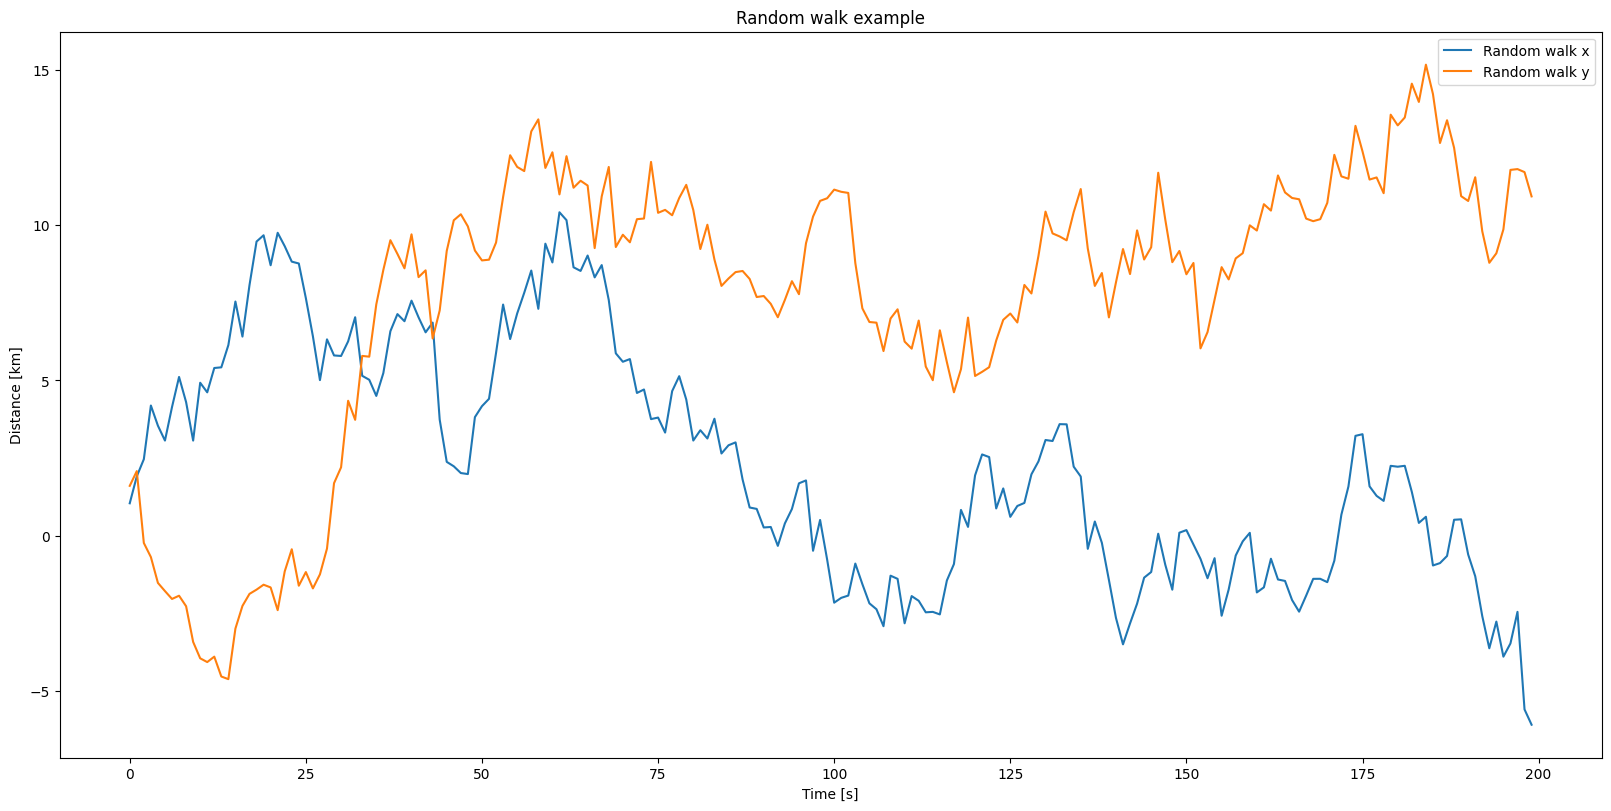

In [6]:
fig, ax = plt.subplots(figsize=(16, 8), layout='constrained')
np.random.seed(19680801)
t = np.arange(200)
x = np.cumsum(np.random.randn(200))
y = np.cumsum(np.random.randn(200))

linesx = ax.plot(t, x, label='Random walk x')
linesy = ax.plot(t, y, label='Random walk y')

# 设置 x 轴标签
ax.set_xlabel('Time [s]')
# 设置 y 轴标签
ax.set_ylabel('Distance [km]')
# 设置标题
ax.set_title('Random walk example')
ax.legend()
plt.show()

也可以使用 `set_xlim` 和 `set_ylim` 方法设置坐标轴的范围，可以使用 `set_xscale` 和 `set_yscale` 设置坐标轴的比例尺度。


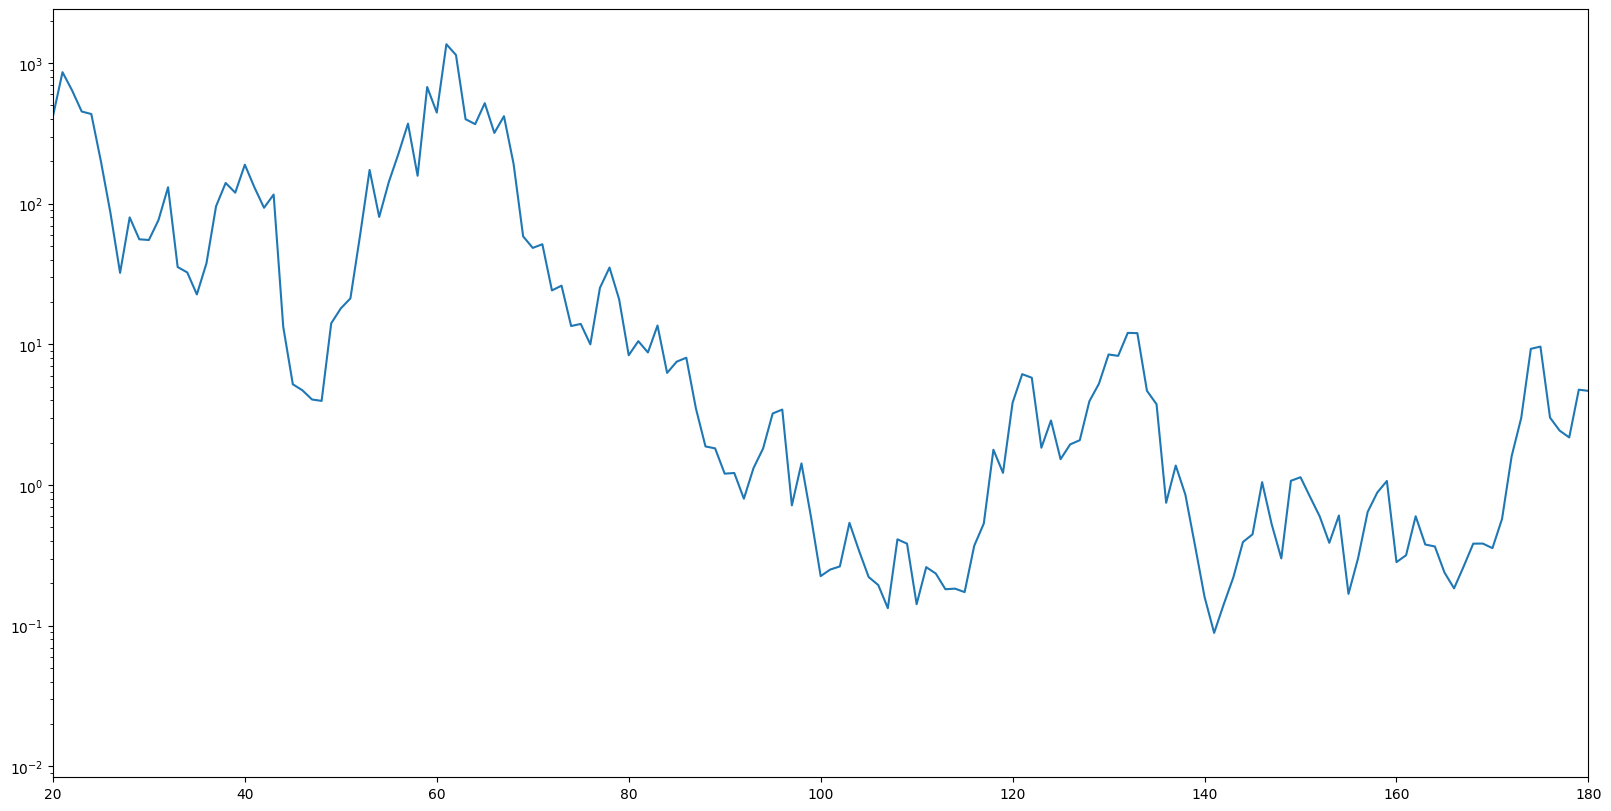

In [8]:
fig, ax = plt.subplots(figsize=(16, 8), layout='constrained')
np.random.seed(19680801)
t = np.arange(200)
x = 2**np.cumsum(np.random.randn(200))
linesx = ax.plot(t, x)
ax.set_yscale('log')
ax.set_xlim([20, 180])
plt.show()

`Axes` 类还提供了处理坐标轴刻度及其标签的辅助方法。其中最直接的是 `set_xticks` 和 `set_yticks`，它们可以手动设置刻度的位置，以及可选地设置它们的标签。可以使用`minorticks_on` 或 `minorticks_off` 来切换次要刻度。


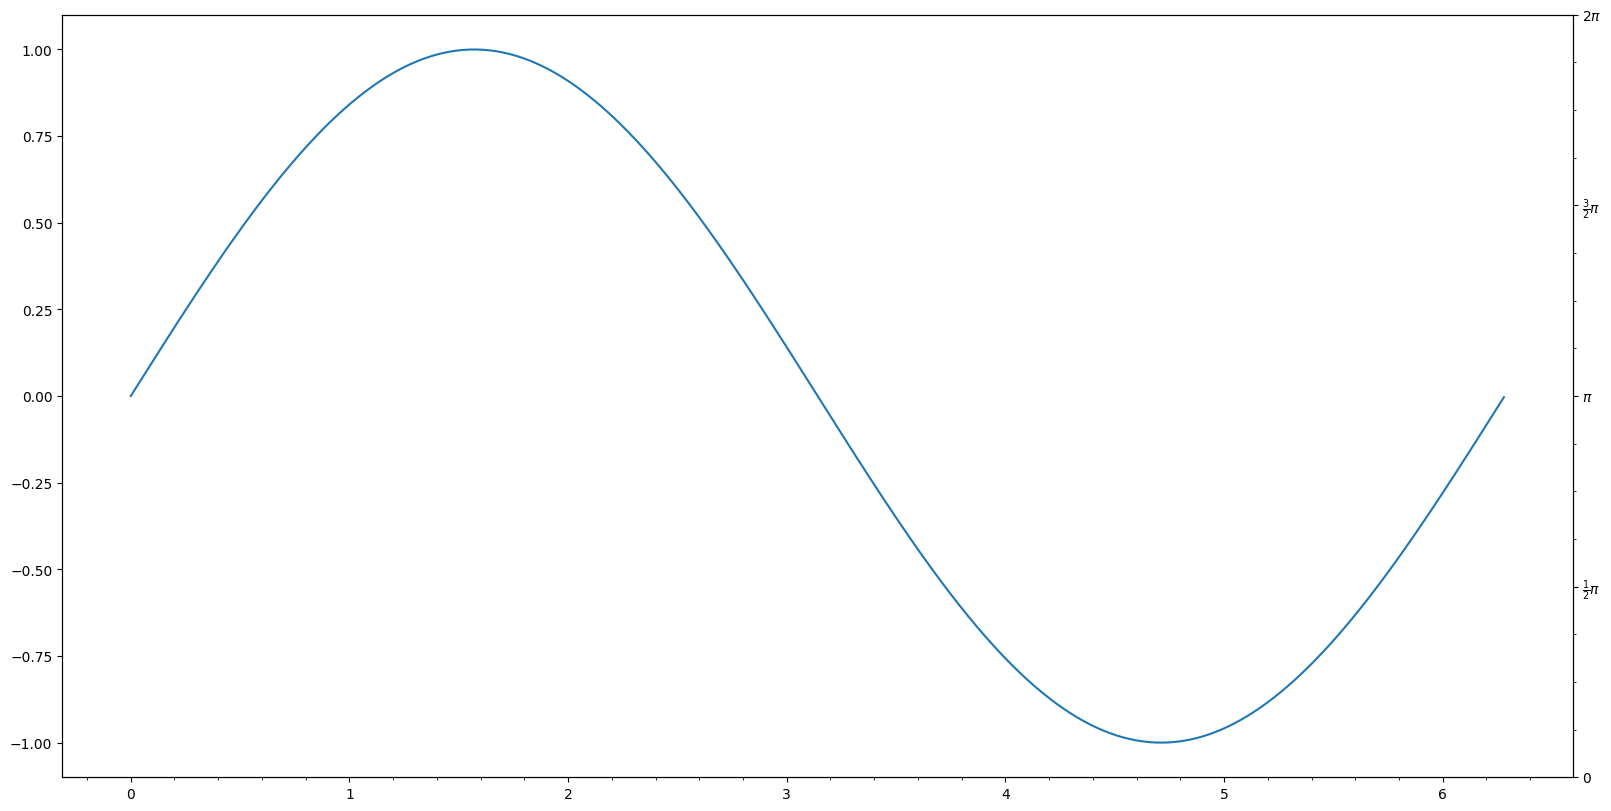

In [8]:
fig, ax = plt.subplots(figsize=(16,8), layout='constrained')

xx = np.arange(0, 2*np.pi, 0.01)
ax.plot(xx, np.sin(xx))

ax2 = ax.twinx() 

# 设置刻度和标签
ax2.set_yticks([0., .5*np.pi, np.pi, 1.5*np.pi, 2*np.pi],
               labels=["$0$", r"$\frac{1}{2}\pi$",
                       r"$\pi$", r"$\frac{3}{2}\pi$", r"$2\pi$"])
# 开启次要刻度
plt.minorticks_on()
plt.show()

也可以使用 `tick_params` 调整 `Axes` 刻度和刻度标签：


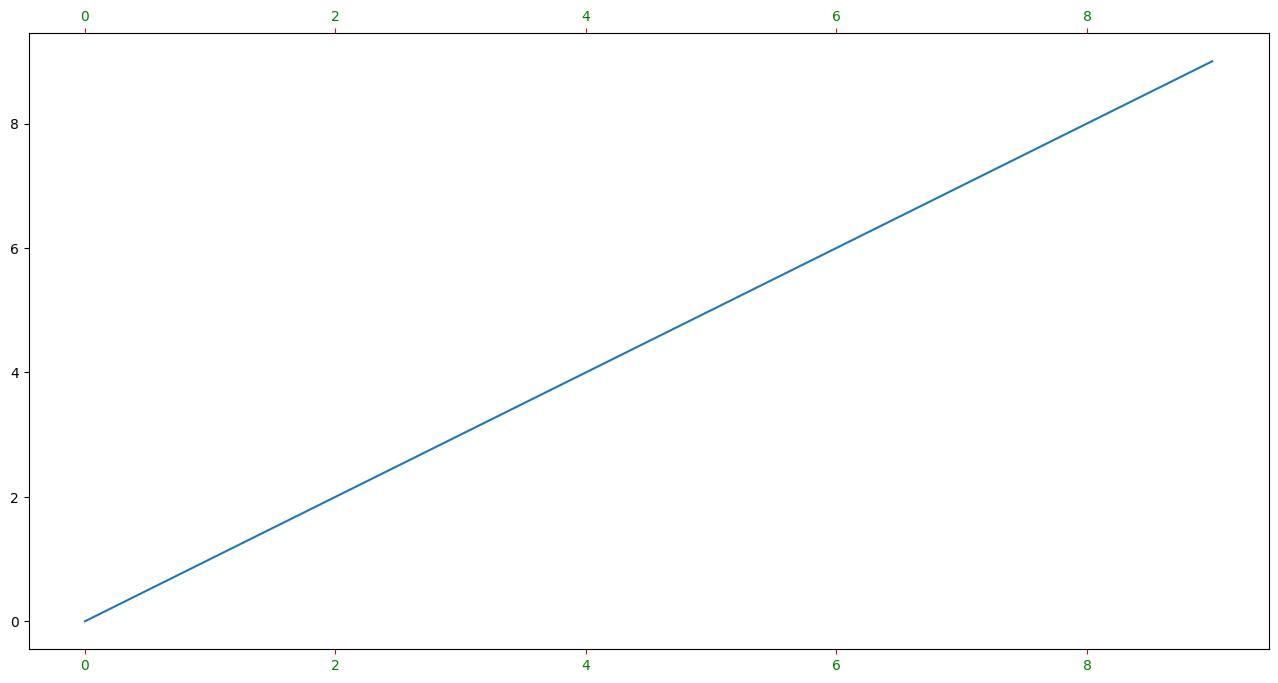

In [9]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(np.arange(10))
ax.tick_params(top=True, labeltop=True, color='red', axis='x',
               labelcolor='green')

## 线

matplotlib 中的线是一个 [`line2D`](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) 对象，它有很多属性，我们可以通过对属性进行修改实现对线的美化和定制。这里，列出一些比较常用的属性：

- `color` 或者 `c`：线的颜色；
- `alpha`：透明度；
- `linewidth`：线的宽度；
- `linestyle` 或者 `ls`；
  - `-` 或者 `solid`：实线；
  - `--` 或者 `dashed`：短划线；
  - `-.` 或者 `dashdot`：点划线；
  - `:` 或者 `dotted`：点虚线；
- [`marker`](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers) 或则 `m`：
  - `.`：点
  - `o`：圆圈
  - `^`：上三角形
  - `+`：加号
  - `x`：X
  - `s`：正方形
  - `*`：五角星

下面，我们在代码中来看一下各种属性的使用：


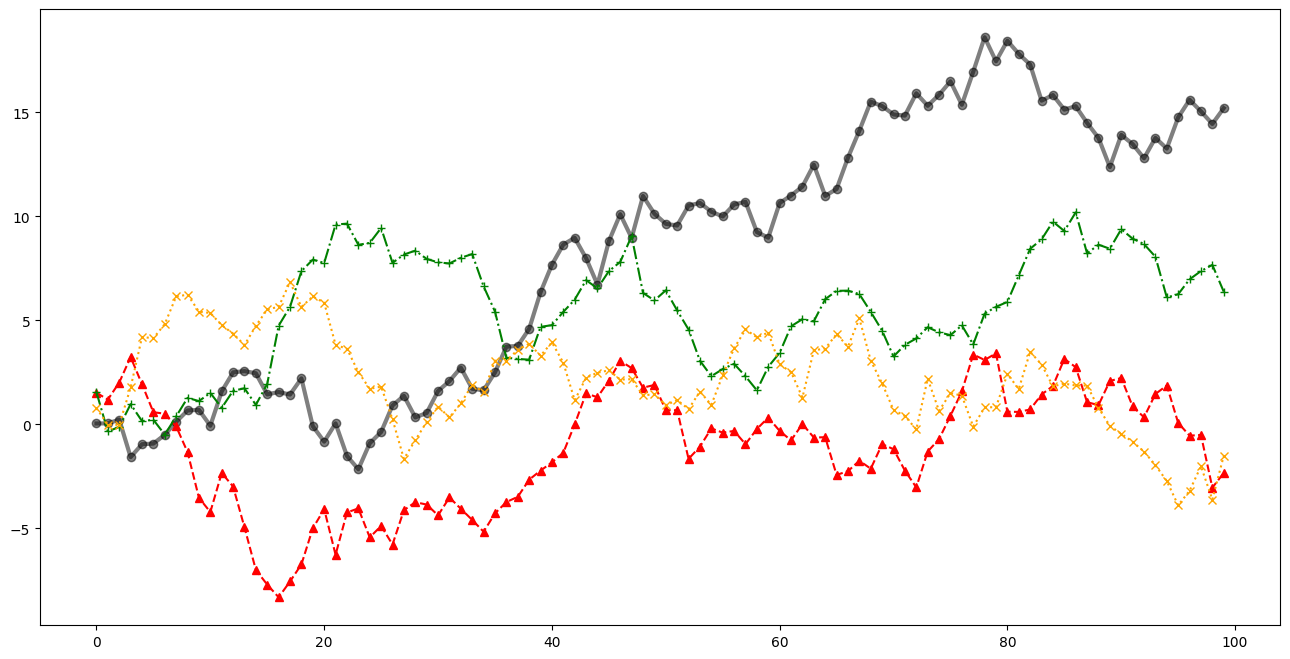

In [7]:
# create some toy data
data1, data2, data3, data4 = np.random.randn(4, 100)

fig, ax = plt.subplots(figsize=(16,8), dpi=100)

ax.plot(np.cumsum(data1), color='black', linewidth='3', linestyle='-', marker='o', alpha=0.5) 
ax.plot(np.cumsum(data2), color='red', linestyle='--', marker='^')
ax.plot(np.cumsum(data3), color='green', linestyle='-.', marker='+')
ax.plot(np.cumsum(data4), color='orange', linestyle=':', marker='x')

我们也可以使用对应的方法来设置或者修改属性值。`ax.plot()` 方法返回一个 `line2D` 对象列表，我们可以在对应的 `line2D` 对象上调用方法。比如，我们可以使用 `set_linestyle()` 方法修改 `linestyle` 属性，可以使用 `set_marker()` 方法修改 `marker` 属性。


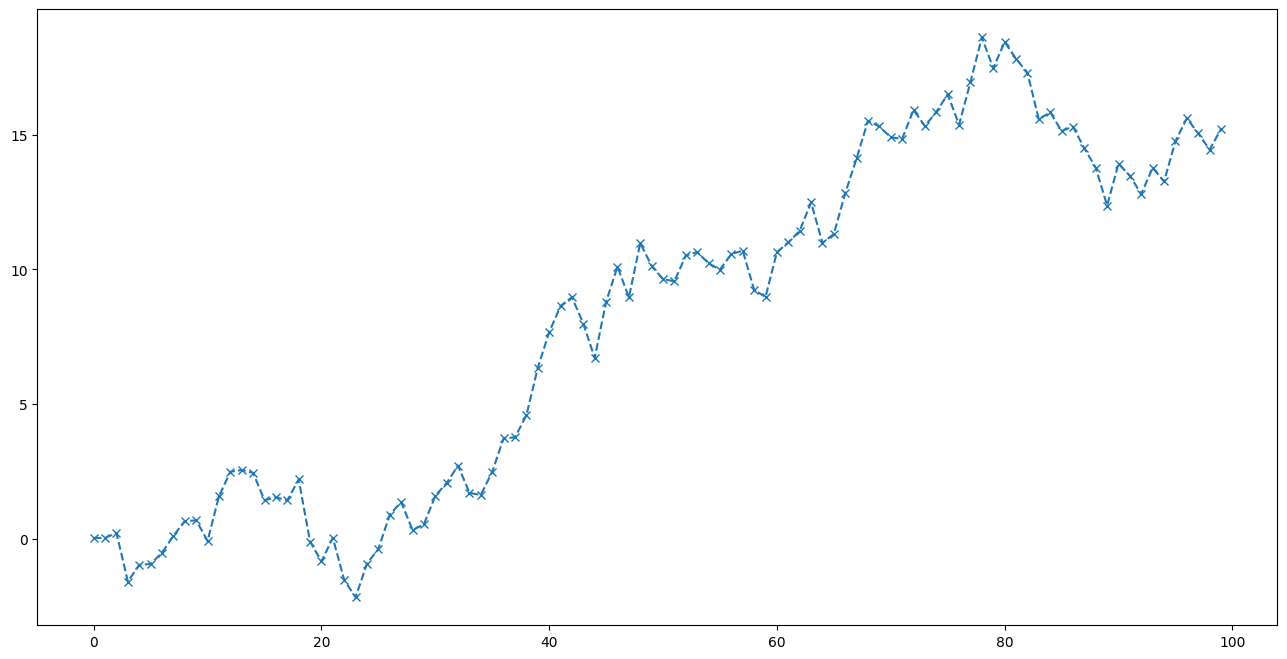

In [8]:
fig, ax = plt.subplots(figsize=(16, 8), dpi=100)

l, = ax.plot(np.cumsum(data1))
l.set_linestyle('--')
l.set_marker('x')

In [9]:
data1, data2, data3, data4 = np.random.randn(4, 100)

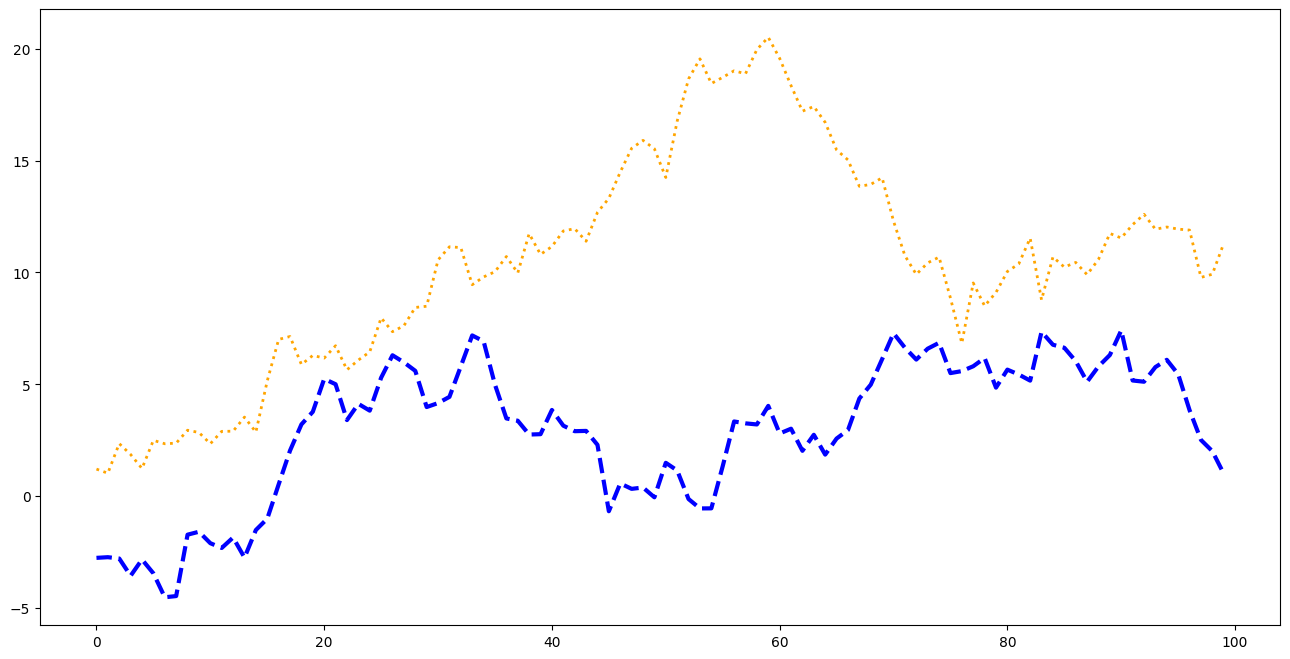

In [10]:
fig, ax = plt.subplots(figsize=(16, 8))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l= ax.plot(x, np.cumsum(data2), color='orange', linewidth=2, linestyle=':')
# l.set_linestyle(':')

## 文字

matplotlib 中的文字是一个 [`matplotlib.text.Text`](https://matplotlib.org/stable/users/explain/text/text_props.html) 对象，利用相关的属性我们可以控制文字显示的样式，包括文字位置、显示的字体、字体大小、颜色等等。

- `alpha`：透明度
- `fontfamily`：FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'
- `fontsize`：float or 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'
- `fontweight`：a numeric value in range 0-1000, 'ultralight', 'light', 'normal', 'regular', 'book', 'medium', 'roman', 'semibold', 'demibold', 'demi', 'bold', 'heavy', 'extra bold', 'black'
- `fontstyle`：'normal', 'italic', 'oblique'

这里放上官方文档的例子：


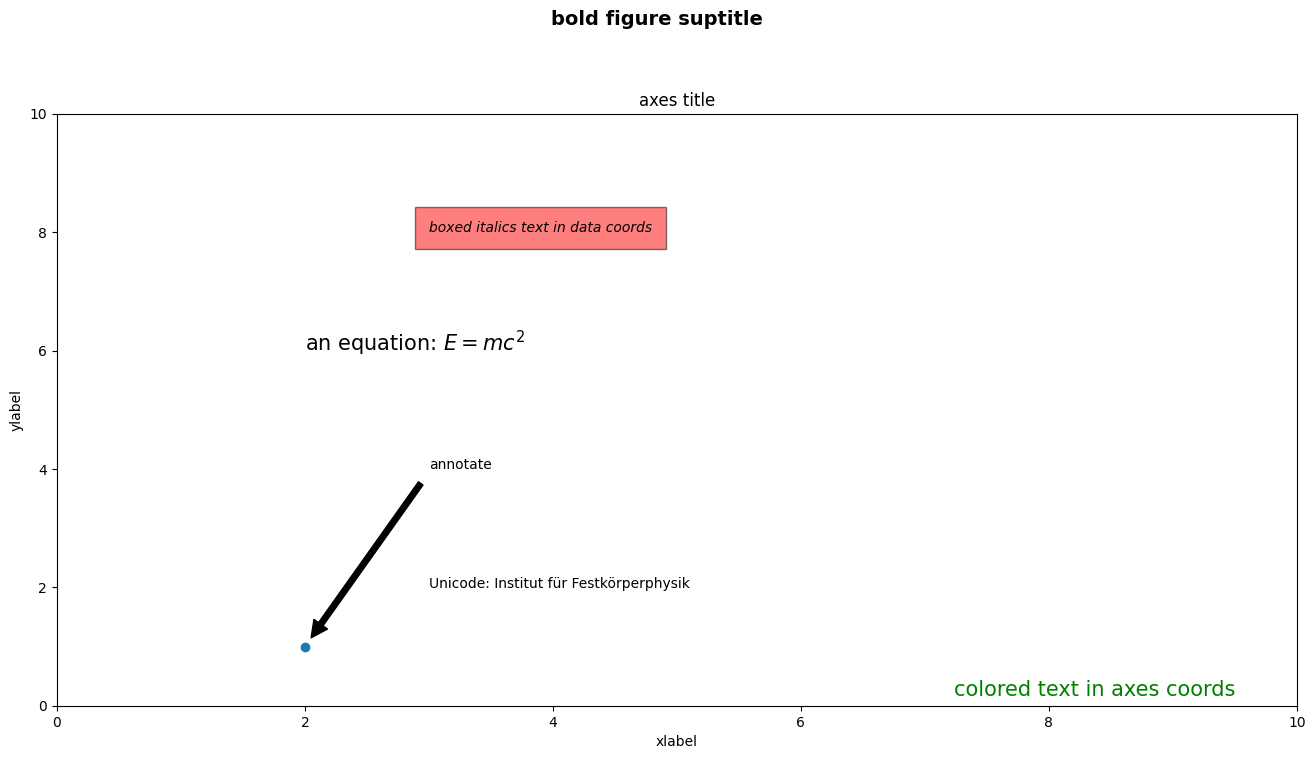

In [10]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)

# Set titles for the figure and the subplot respectively
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

# Set both x- and y-axis limits to [0, 10] instead of default [0, 1]
ax.axis([0, 10, 0, 10])

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

ax.text(3, 2, 'Unicode: Institut für Festkörperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)

ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

## 图例

[`Axes.legend(*args, **kwargs)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html#matplotlib.axes.Axes.legend)


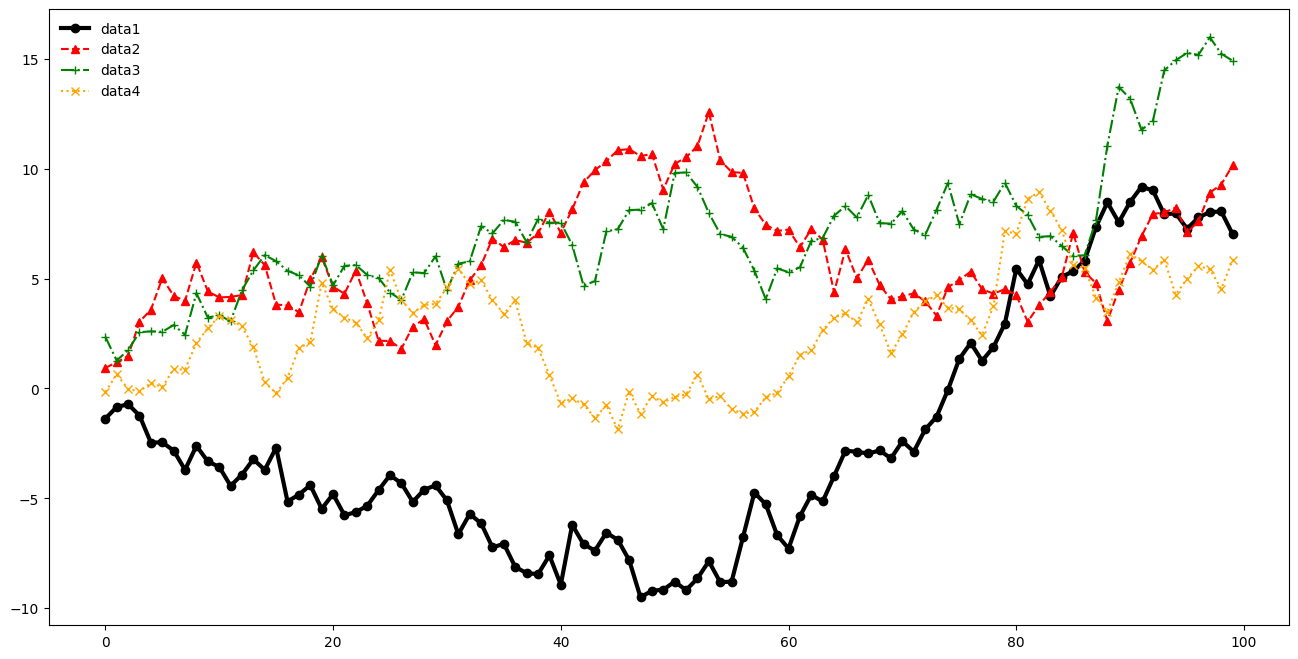

In [11]:
data1, data2, data3, data4 = np.random.randn(4, 100)

fig, ax = plt.subplots(figsize=(16,8), dpi=100)

ax.plot(np.cumsum(data1), color='black', linewidth='3', linestyle='-', marker='o', label='data1') 
ax.plot(np.cumsum(data2), color='red', linestyle='--', marker='^', label='data2')
ax.plot(np.cumsum(data3), color='green', linestyle='-.', marker='+', label='data3')
ax.plot(np.cumsum(data4), color='orange', linestyle=':', marker='x', label='data4')

ax.legend(loc='best', frameon=False)
plt.show()

## Spines


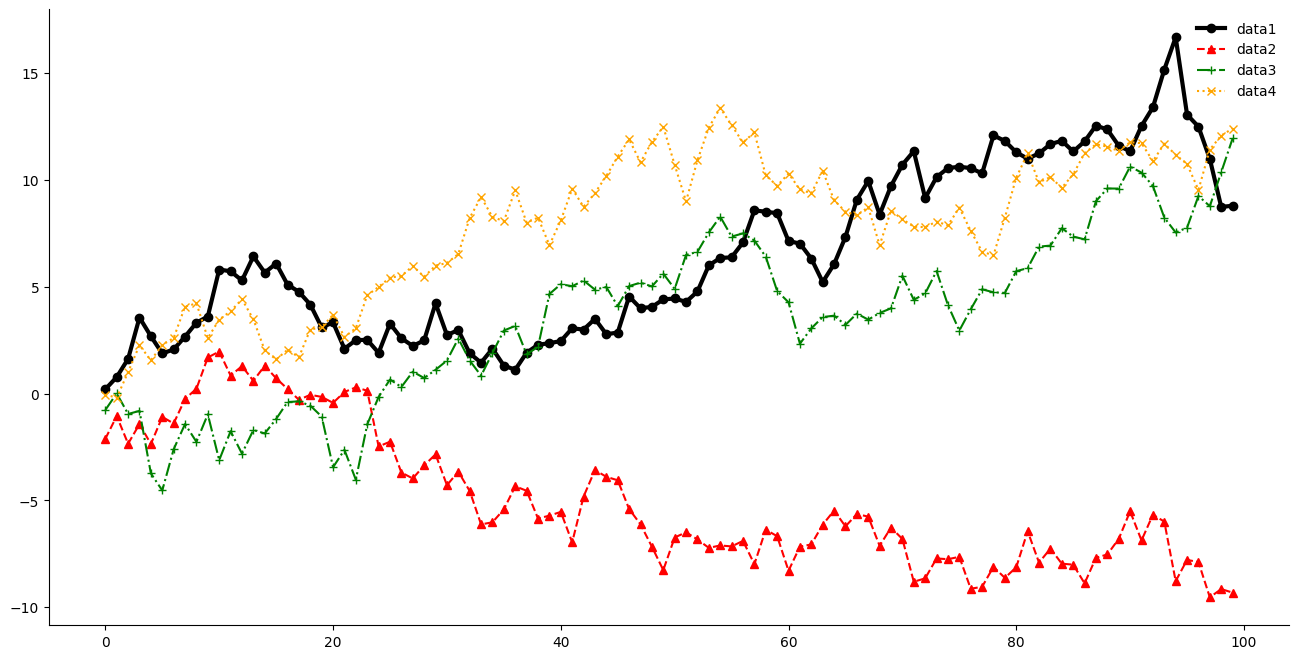

In [12]:
data1, data2, data3, data4 = np.random.randn(4, 100)

fig, ax = plt.subplots(figsize=(16,8), dpi=100)

ax.plot(np.cumsum(data1), color='black', linewidth='3', linestyle='-', marker='o', label='data1') 
ax.plot(np.cumsum(data2), color='red', linestyle='--', marker='^', label='data2')
ax.plot(np.cumsum(data3), color='green', linestyle='-.', marker='+', label='data3')
ax.plot(np.cumsum(data4), color='orange', linestyle=':', marker='x', label='data4')

ax.legend(loc='best', frameon=False)

# Remove the plot frame lines. They are unnecessary chartjunk.
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

# References

- https://matplotlib.org/matplotblog/posts/pyplot-vs-object-oriented-interface/
- https://stackoverflow.com/questions/52816131/matplotlib-pyplot-documentation-says-it-is-state-based-interface-to-matplotlib
- https://matplotlib.org/stable/tutorials/introductory/usage.html#styling-artists
